In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")
from xgboost import *

In [18]:
df = pd.read_csv("Turbine_Data.csv")

In [19]:
df.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [20]:
df_1 = df.set_index(keys="Unnamed: 0")
df_1.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [21]:
df_1.duplicated().sum()

23039

In [22]:
len(df_1)

118224

In [23]:
df_2 = df_1.drop_duplicates()
df_2.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2018-01-01 00:00:00+00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.000000,-9.960830,NaN,NaN,G01,8.000000,2.279088
2018-01-01 00:10:00+00:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,300.428571,-9.628441,NaN,NaN,G01,300.428571,2.339343
2018-01-01 00:20:00+00:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,340.000000,-9.491235,NaN,NaN,G01,340.000000,2.455610
2018-01-01 00:30:00+00:00,-4.648054,22.966851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,345.000000,-9.856136,NaN,NaN,G01,345.000000,2.026754


In [24]:
pp = df_2.nunique()
one_value_cols = pp[pp==1].index.values
one_value_cols

array(['ControlBoxTemperature', 'WTG'], dtype=object)

In [25]:
df_3 = df_2.drop(columns=one_value_cols)
df_3.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
Unnamed: 0,,,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:00:00+00:00,-5.357727,23.148729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,-9.960830,NaN,NaN,8.000000,2.279088
2018-01-01 00:10:00+00:00,-5.822360,23.039754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.428571,-9.628441,NaN,NaN,300.428571,2.339343
2018-01-01 00:20:00+00:00,-5.279409,22.948703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.000000,-9.491235,NaN,NaN,340.000000,2.455610
2018-01-01 00:30:00+00:00,-4.648054,22.966851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.000000,-9.856136,NaN,NaN,345.000000,2.026754


In [26]:
df_3.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94624.000000,93698.000000,62380.000000,41987.000000,41882.000000,41882.000000,62402.000000,62430.000000,62287.000000,62419.000000,62441.000000,62268.000000,62369.000000,72108.000000,94622.000000,62119.000000,6.275900e+04,72108.000000,94469.000000
mean,619.036994,28.777569,43.105338,9.751759,10.038709,10.038709,64.376222,57.561706,1102.146658,72.462897,71.829134,36.979752,39.635107,196.307894,88.070309,9.908585,2.284016e+03,196.307894,5.879193
std,610.917748,4.358470,5.168850,20.646533,20.272100,20.272100,10.020754,6.324124,527.967896,22.626685,22.649494,4.884101,5.428555,88.279316,116.498176,4.717546,3.590288e+05,88.279316,2.617241
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,80.098952,25.625603,39.856871,-0.939896,-0.433316,-0.433316,57.925129,53.944023,1029.812895,55.492241,54.763998,33.977709,35.843574,145.000000,-0.433723,9.231097,2.000000e+00,145.000000,3.824572
50%,402.880706,28.338961,42.927465,0.395038,0.889782,0.889782,64.862406,57.197064,1124.930500,65.792061,65.006679,37.003815,39.500759,182.000000,35.938526,10.099272,2.000000e+00,182.000000,5.558520
75%,1073.979105,31.665910,47.018075,8.101939,8.481306,8.481306,71.104401,61.307270,1515.517020,85.874609,85.342714,40.009538,43.370342,271.000000,147.190453,13.600908,2.000000e+00,271.000000,7.505555
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [27]:
df_4 = df_3[df_3["ActivePower"]>=0]
df_4.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
Unnamed: 0,,,,,,,,,,,,,,,,,,,
2018-01-01 06:20:00+00:00,26.212347,28.696304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.00,3.976499,NaN,NaN,252.00,3.042750
2018-01-01 06:40:00+00:00,59.632658,29.052567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.00,11.091660,NaN,NaN,255.00,3.424814
2018-01-01 06:50:00+00:00,40.889650,28.984758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.75,4.234497,NaN,NaN,264.75,3.507172
2018-01-01 10:40:00+00:00,34.398111,30.282058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.75,5.347792,NaN,NaN,283.75,3.442212
2018-01-01 12:00:00+00:00,29.797653,29.333519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.00,6.022326,NaN,NaN,274.00,3.031363


In [28]:
(df_4.isna().sum() * 100 / df_4.isna().sum().sum()).round(2)

ActivePower                     0.00
AmbientTemperatue               0.23
BearingShaftTemperature         6.09
Blade1PitchAngle                9.83
Blade2PitchAngle                9.85
Blade3PitchAngle                9.85
GearboxBearingTemperature       6.09
GearboxOilTemperature           6.09
GeneratorRPM                    6.09
GeneratorWinding1Temperature    6.09
GeneratorWinding2Temperature    6.09
HubTemperature                  6.12
MainBoxTemperature              6.10
NacellePosition                 4.64
ReactivePower                   0.01
RotorRPM                        6.09
TurbineStatus                   6.01
WindDirection                   4.64
WindSpeed                       0.07
dtype: float64

In [29]:
df_5 = df_4.reset_index()
df_5 = df_5.rename(columns={"Unnamed: 0":"timestamp"})
df_5.head()

,timestamp,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
0,2018-01-01 06:20:00+00:00,26.212347,28.696304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.00,3.976499,NaN,NaN,252.00,3.042750
1,2018-01-01 06:40:00+00:00,59.632658,29.052567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.00,11.091660,NaN,NaN,255.00,3.424814
2,2018-01-01 06:50:00+00:00,40.889650,28.984758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.75,4.234497,NaN,NaN,264.75,3.507172
3,2018-01-01 10:40:00+00:00,34.398111,30.282058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.75,5.347792,NaN,NaN,283.75,3.442212
4,2018-01-01 12:00:00+00:00,29.797653,29.333519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.00,6.022326,NaN,NaN,274.00,3.031363


In [30]:
df_6 = df_5.copy()
df_6["timestamp"] = pd.to_datetime(df_6["timestamp"])
df_6["date"] = df_6["timestamp"].dt.date
df_7 = df_6.drop(columns="timestamp")
df_8 = df_7.groupby(by="date").mean()
df_8.head()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
date,,,,,,,,,,,,,,,,,,,
2018-01-01,366.223561,25.528849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.727612,74.042120,NaN,NaN,276.727612,5.263797
2018-01-02,462.550740,25.357526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.105603,93.555723,NaN,NaN,274.105603,5.390719
2018-01-03,454.417752,24.379363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.369130,91.627843,NaN,NaN,286.369130,5.295225
2018-01-04,369.952190,24.912347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.445471,74.360621,NaN,NaN,284.445471,5.094994
2018-01-05,319.446595,23.535679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292.013293,64.366148,NaN,NaN,292.013293,4.915224


In [31]:
mms = MinMaxScaler()

df_9 = pd.DataFrame(mms.fit_transform(df_8), columns=df_8.columns, index=df_8.index)
df_9

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
date,,,,,,,,,,,,,,,,,,,
2018-01-01,0.212896,0.259584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.771125,0.218215,NaN,NaN,0.771125,0.208981
2018-01-02,0.268893,0.249121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.762462,0.273671,NaN,NaN,0.762462,0.220853
2018-01-03,0.264166,0.189383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802980,0.268192,NaN,NaN,0.802980,0.211920
2018-01-04,0.215063,0.221933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.796625,0.219120,NaN,NaN,0.796625,0.193190
2018-01-05,0.185703,0.137858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.821629,0.190717,NaN,NaN,0.821629,0.176374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26,0.425556,0.532103,0.817479,0.014095,0.014761,0.014761,0.763438,0.753237,0.739908,0.543258,0.537948,0.716306,0.682421,0.412392,0.350018,0.739612,1.210324e-07,0.412392,0.300834
2020-03-27,0.423727,0.610315,0.825098,0.012691,0.012958,0.012958,0.759644,0.737923,0.769698,0.543261,0.539233,0.723301,0.725272,0.446932,0.322365,0.769404,1.956122e-07,0.446932,0.297245
2020-03-28,0.508087,0.597157,0.953943,0.020091,0.021112,0.021112,0.792795,0.770955,0.775746,0.622631,0.617786,0.881586,0.688650,0.461021,0.406684,0.775382,1.860102e-04,0.461021,0.350527


In [32]:
features_required = df_9.columns.values.tolist()[1:]
target_required = df_9.columns.values.tolist()[0]
print("Features : ")
print(features_required)
print()
print("Target   : ")
print(target_required)

Features : 
['AmbientTemperatue', 'BearingShaftTemperature', 'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle', 'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature', 'HubTemperature', 'MainBoxTemperature', 'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WindDirection', 'WindSpeed']

Target   : 
ActivePower


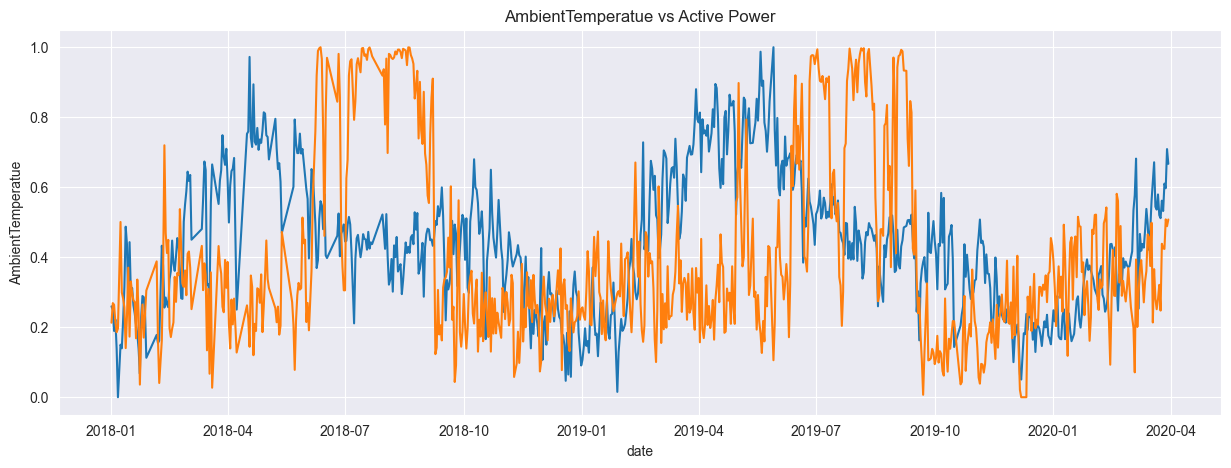

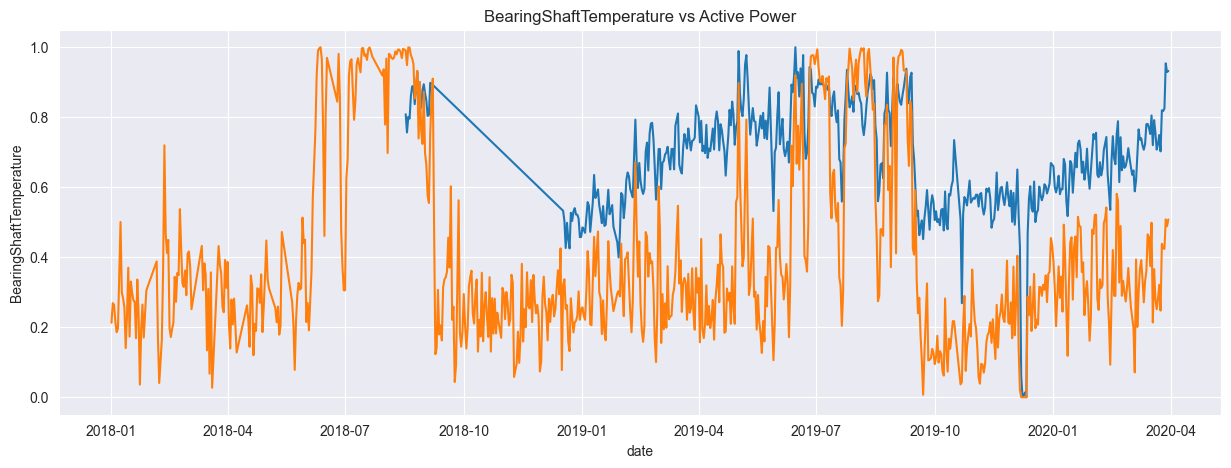

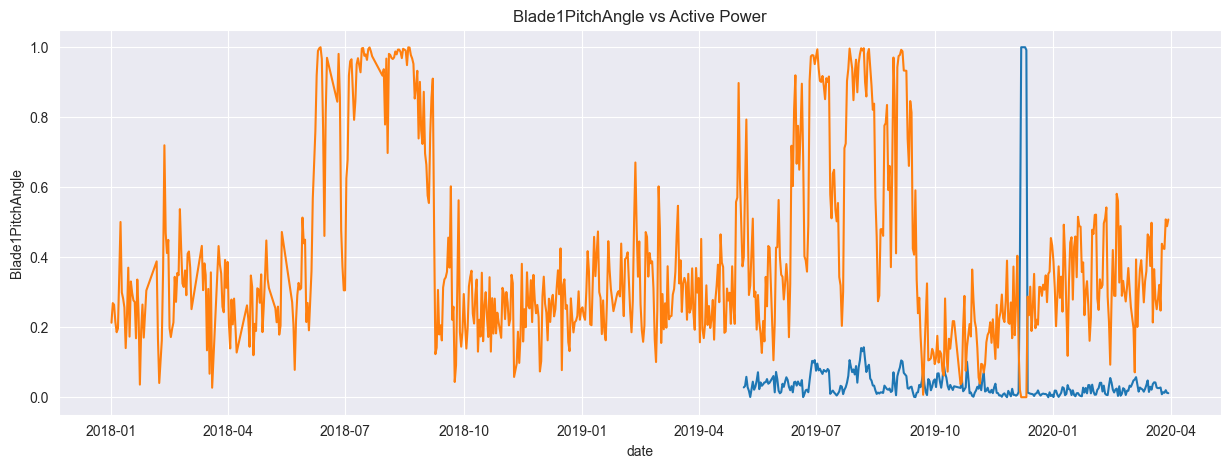

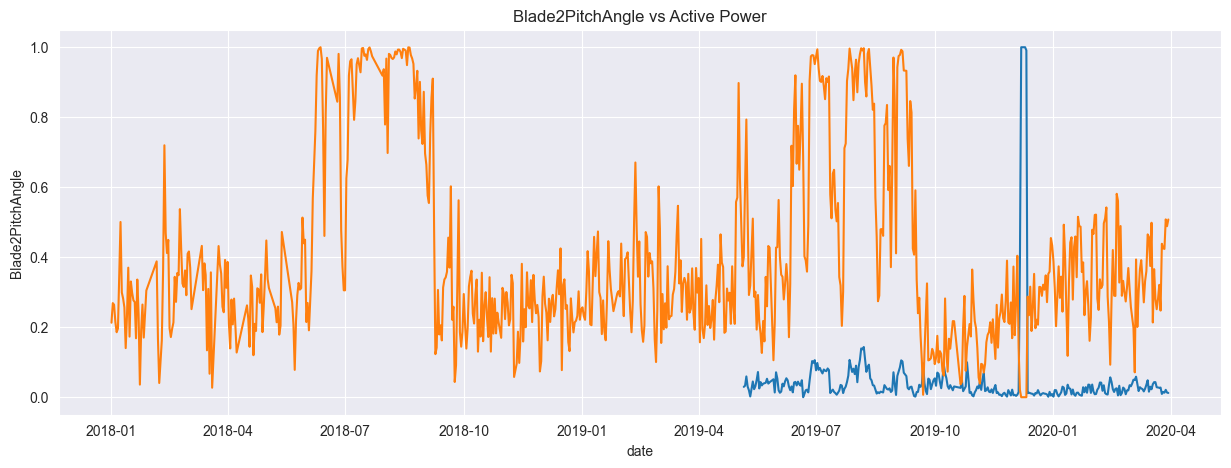

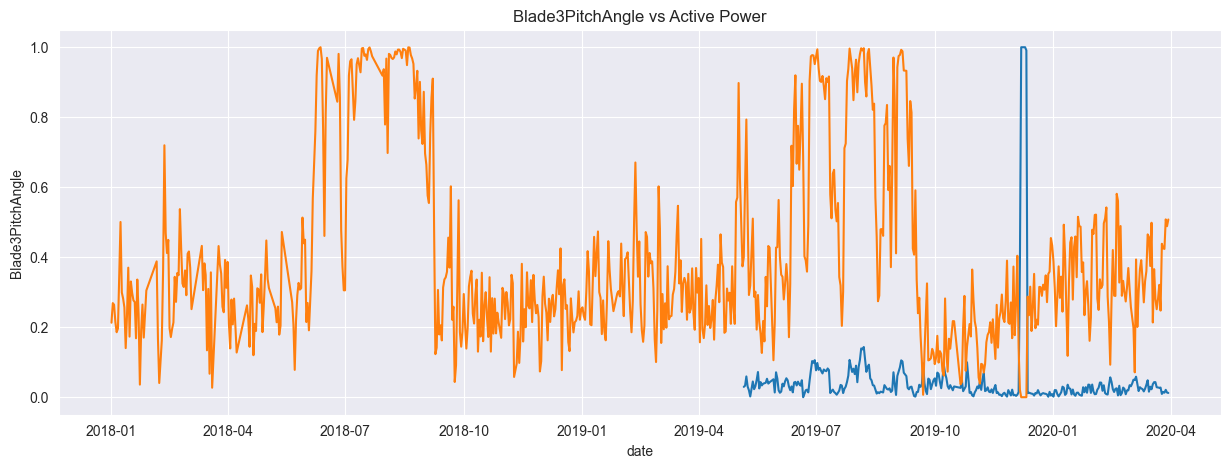

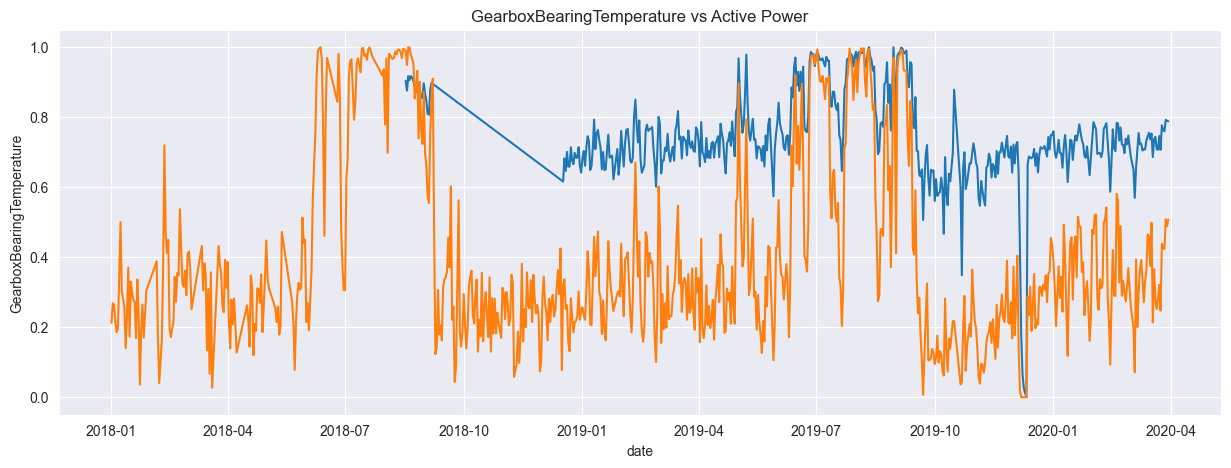

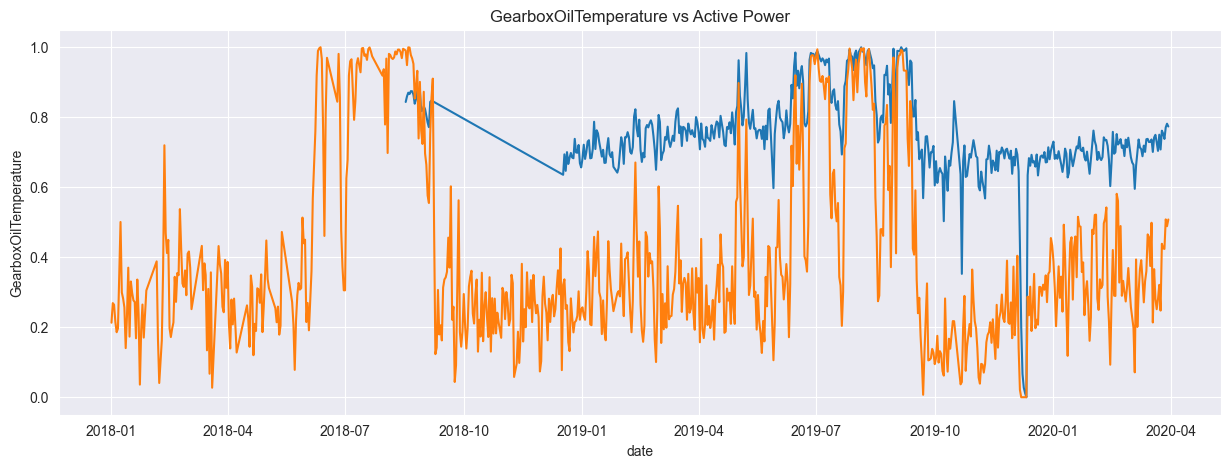

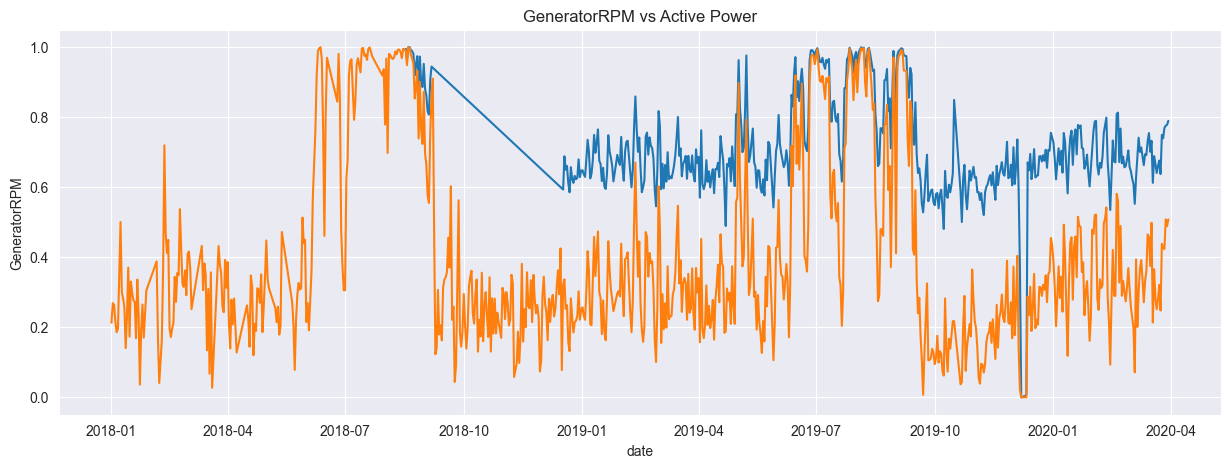

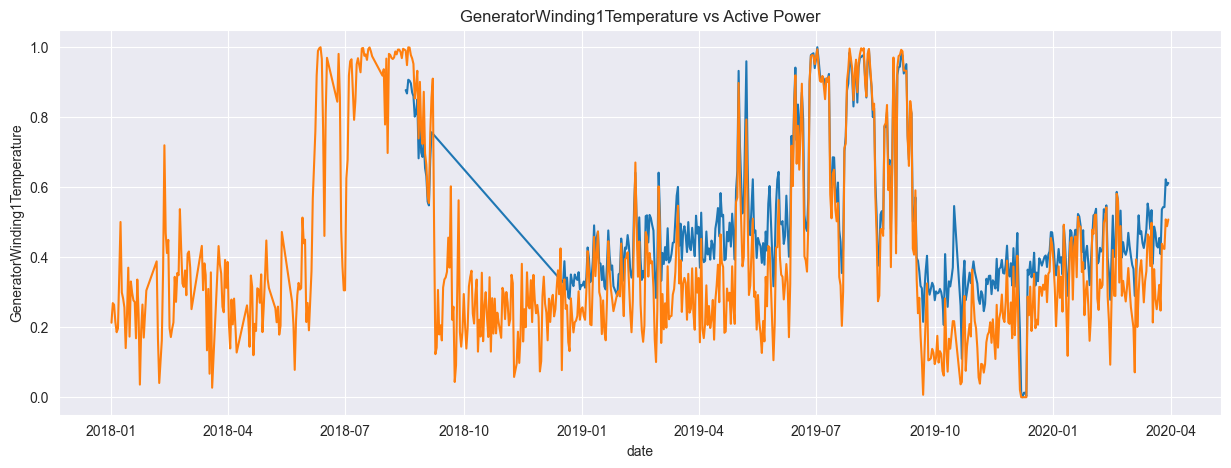

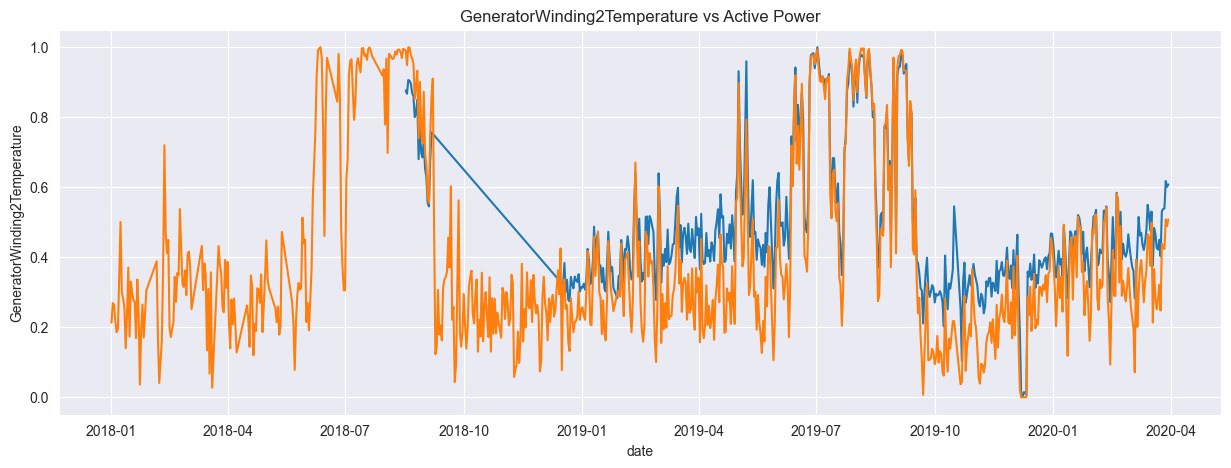

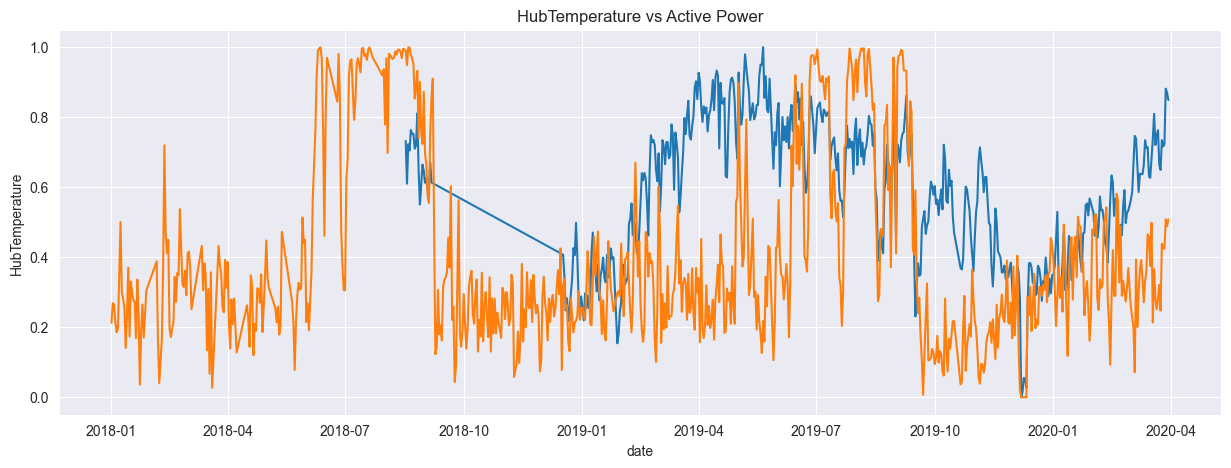

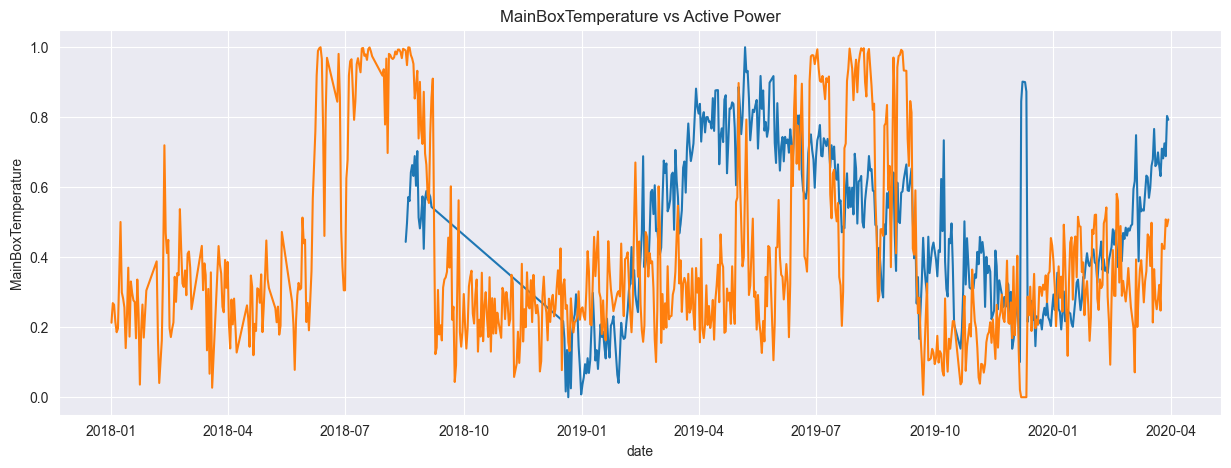

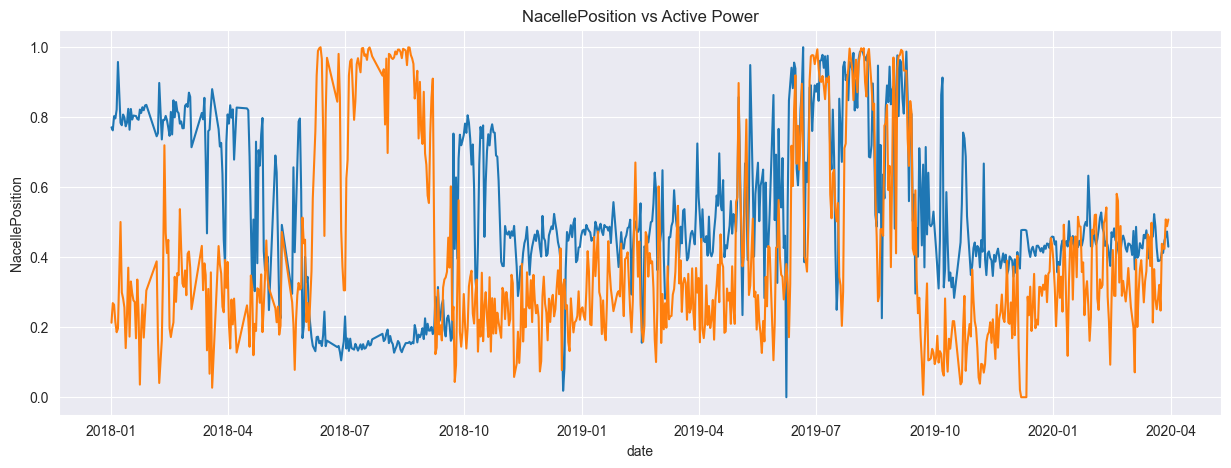

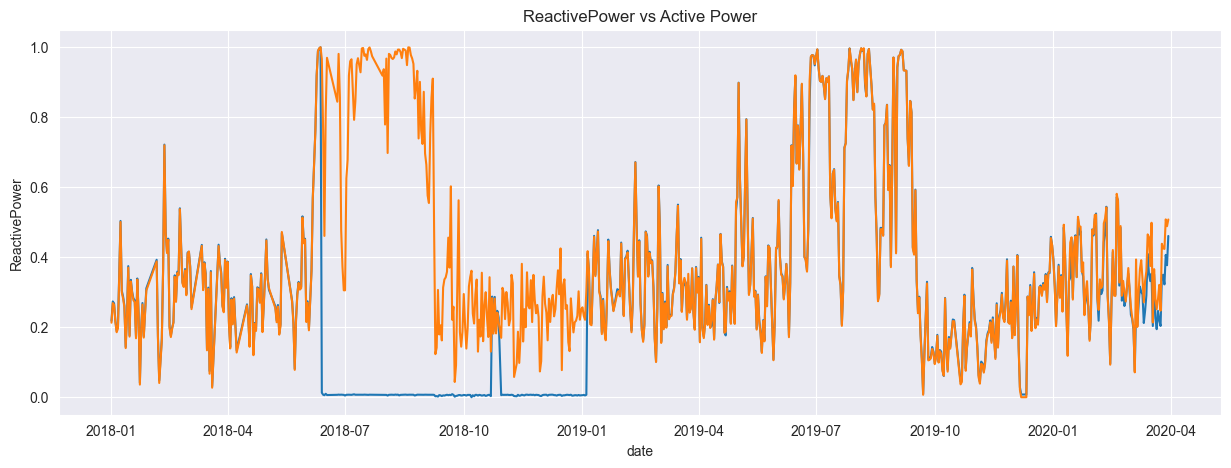

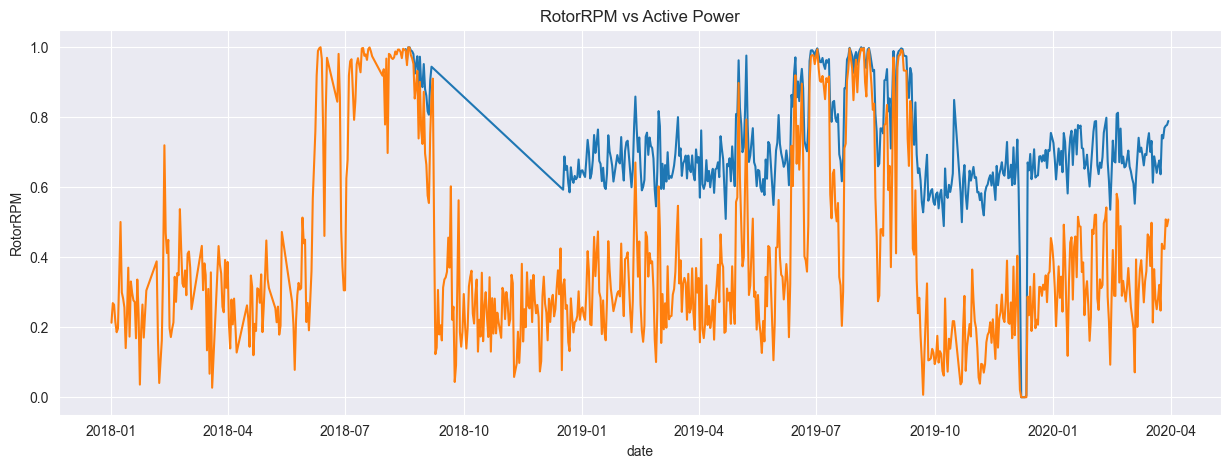

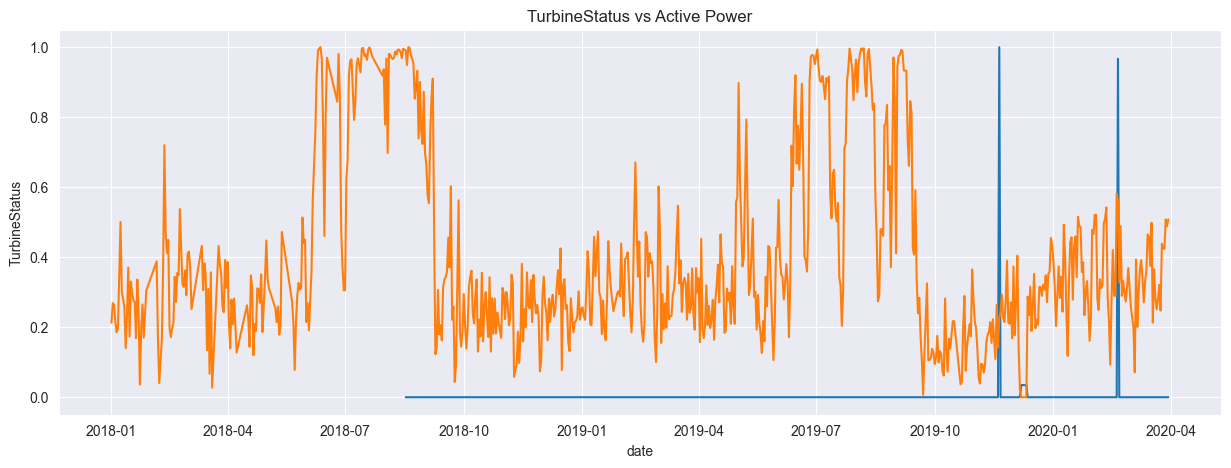

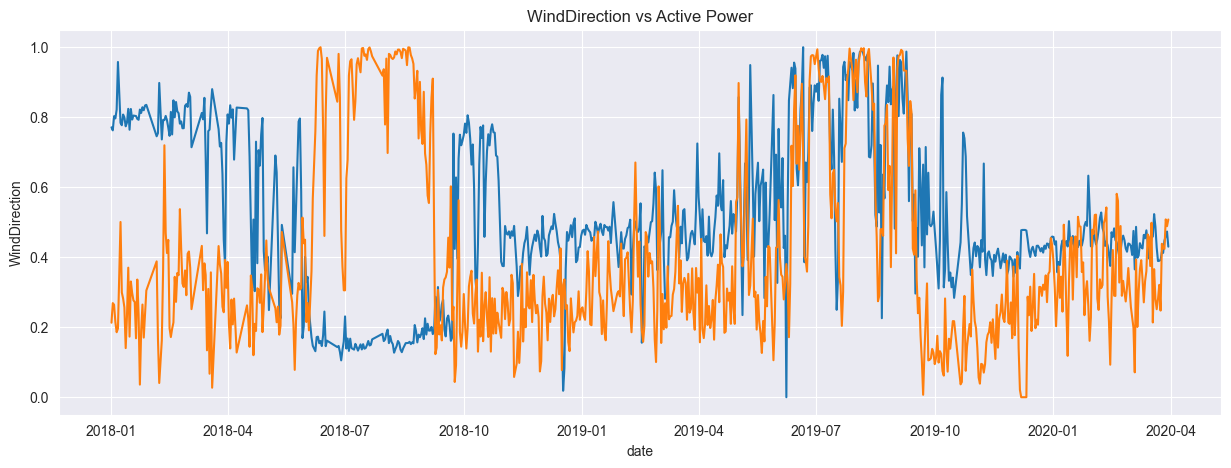

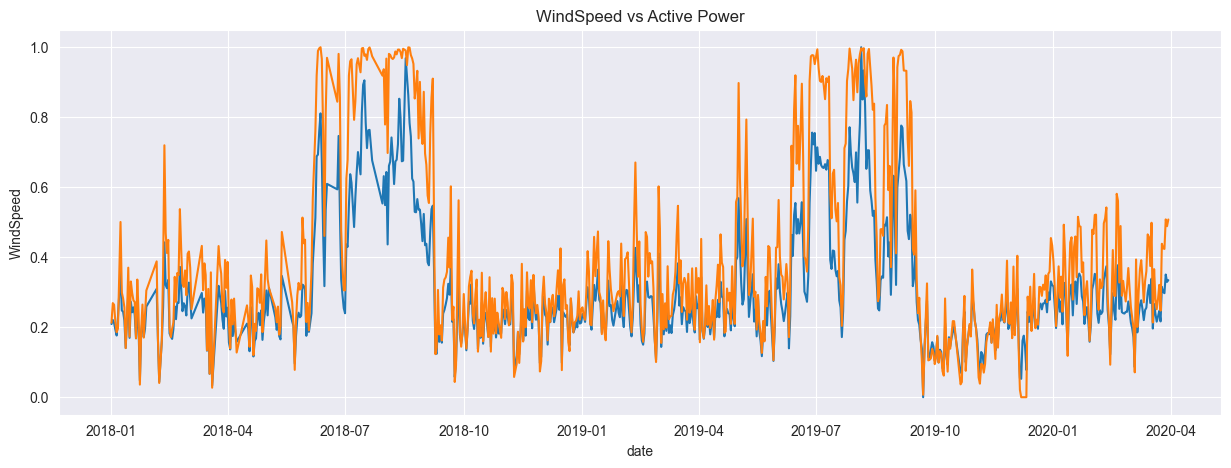

In [37]:
for i in features_required:
    fig, ax = plt.subplots(figsize=(15,5))
    sns.lineplot(x=df_9.index,y=df_9[i])
    sns.lineplot(x=df_9.index,y=df_9["ActivePower"])
    ax.set(title=i+" vs Active Power")

<Axes: >

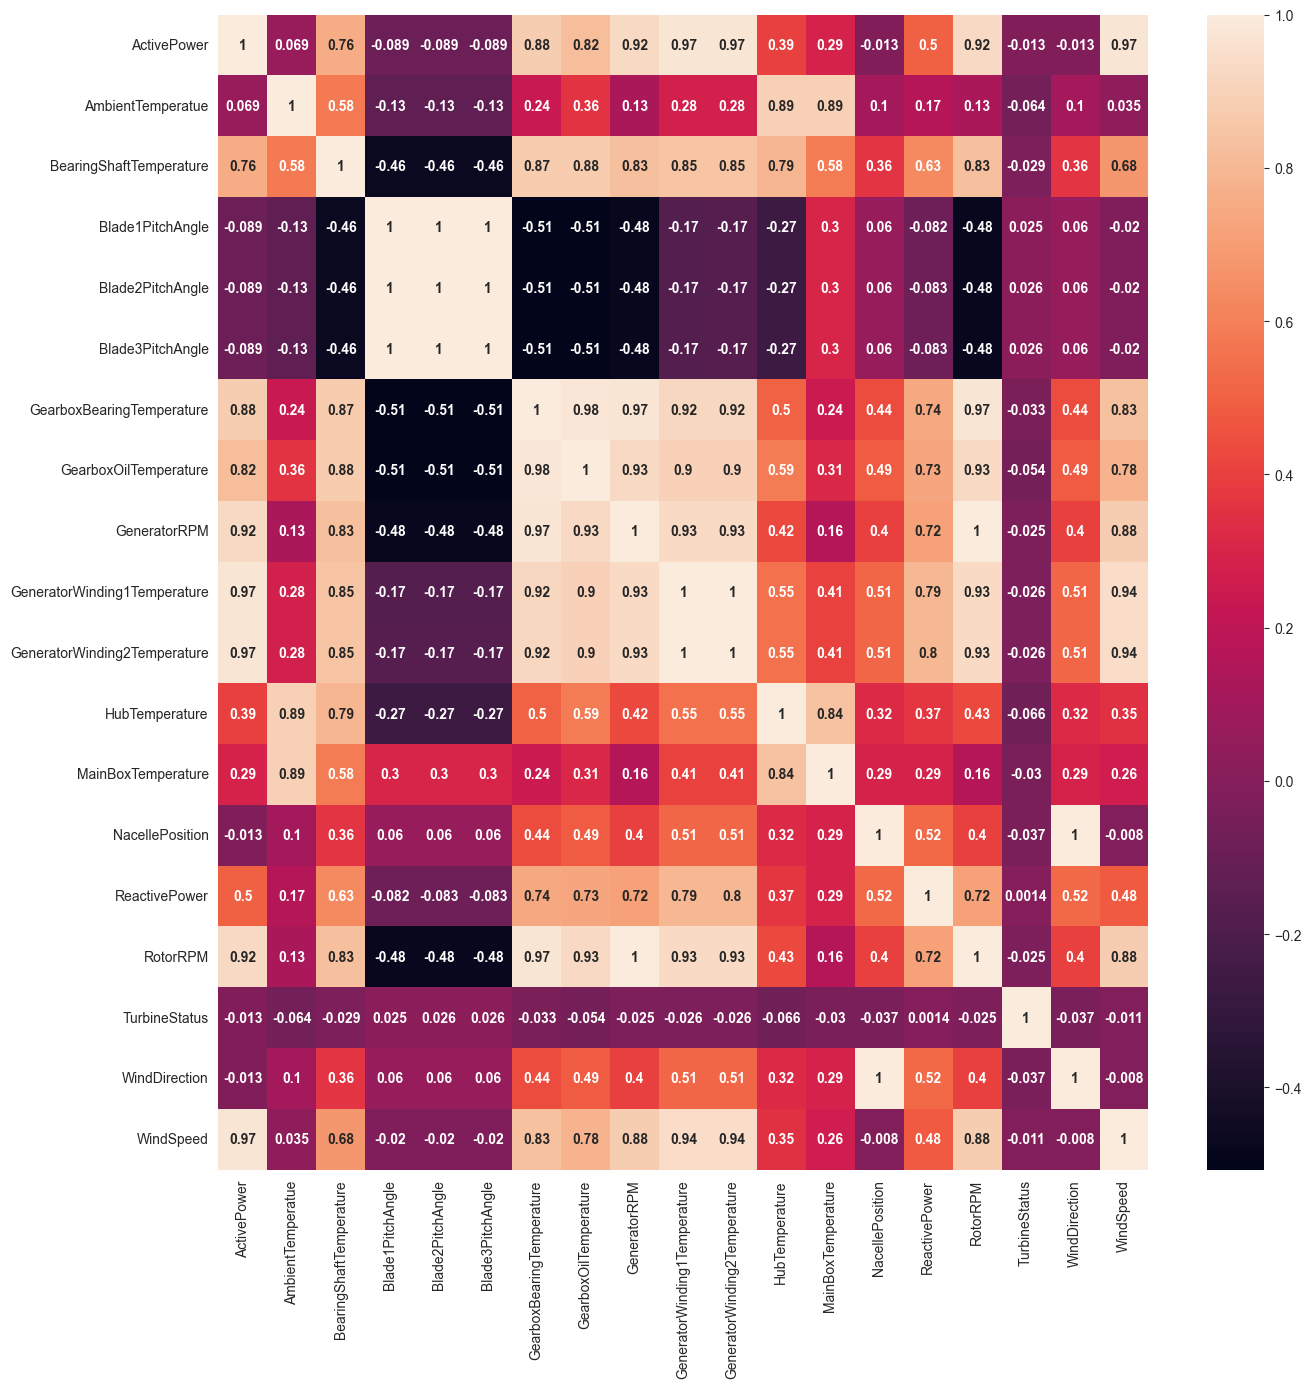

In [38]:
corr_matrix = df_9.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, ax=ax, annot_kws={"weight":"bold"})

In [77]:
corr_matrix_1 = corr_matrix.loc[["WindDirection", "NacellePosition", "GeneratorWinding1Temperature", "GeneratorWinding2Temperature"],["ActivePower","WindSpeed"]]
corr_matrix_1

,ActivePower,WindSpeed
WindDirection,-0.012806,-0.007976
NacellePosition,-0.012806,-0.007976
GeneratorWinding1Temperature,0.972213,0.943642
GeneratorWinding2Temperature,0.972818,0.944268


In [78]:
df_final = df_4[["WindSpeed","ActivePower"]]
df_final.dropna(inplace=True)
df_final.head()

,WindSpeed,ActivePower
Unnamed: 0,,
2018-01-01 06:20:00+00:00,3.042750,26.212347
2018-01-01 06:40:00+00:00,3.424814,59.632658
2018-01-01 06:50:00+00:00,3.507172,40.889650
2018-01-01 10:40:00+00:00,3.442212,34.398111
2018-01-01 12:00:00+00:00,3.031363,29.797653


In [85]:
train_length = round(df_final.shape[0] * 0.75)
indices_df_final = df_final.index.values
train_indices = indices_df_final[:train_length]
test_indices = indices_df_final[train_length:]

In [103]:
X_train = df_final.loc[train_indices,"WindSpeed"]
X_test = df_final.loc[test_indices,"WindSpeed"]
y_train = df_final.loc[train_indices,"ActivePower"]
y_test = df_final.loc[test_indices,"ActivePower"]

In [107]:
xgb_regr_1 = XGBRegressor(n_estimators=200)
xgb_regr_1.fit(X_train, y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=2,verbose=True)

[0]	validation_0-rmse:435.70937	validation_1-rmse:386.54013
[1]	validation_0-rmse:310.65130	validation_1-rmse:280.57808
[2]	validation_0-rmse:225.25410	validation_1-rmse:208.61759
[3]	validation_0-rmse:168.22416	validation_1-rmse:160.85528
[4]	validation_0-rmse:131.51710	validation_1-rmse:130.19471
[5]	validation_0-rmse:109.09650	validation_1-rmse:111.30755
[6]	validation_0-rmse:96.21067	validation_1-rmse:100.10655
[7]	validation_0-rmse:89.21380	validation_1-rmse:93.63592
[8]	validation_0-rmse:85.57032	validation_1-rmse:89.93154
[9]	validation_0-rmse:83.71948	validation_1-rmse:87.80270
[10]	validation_0-rmse:82.79818	validation_1-rmse:86.56178
[11]	validation_0-rmse:82.34013	validation_1-rmse:85.81596
[12]	validation_0-rmse:82.11367	validation_1-rmse:85.35732
[13]	validation_0-rmse:81.99798	validation_1-rmse:85.06701
[14]	validation_0-rmse:81.94085	validation_1-rmse:84.88309
[15]	validation_0-rmse:81.91207	validation_1-rmse:84.76345
[16]	validation_0-rmse:81.89775	validation_1-rmse:84.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [108]:
y_pred = xgb_regr_1.predict(X_test)
y_pred[0:10]

array([820.56757, 615.7462 , 626.96844, 699.86633, 720.34973, 566.1519 ,
       586.76447, 539.96564, 376.47495, 363.93622], dtype=float32)

In [110]:
target_df = pd.DataFrame(columns=["Actual","Predicted"],index=y_test.index)
target_df["Actual"] = y_test.copy()
target_df["Predicted"] = y_pred.copy()

In [112]:
target_df.head()

,Actual,Predicted
Unnamed: 0,,
2019-09-24 02:50:00+00:00,758.268904,820.567566
2019-09-24 03:00:00+00:00,603.322136,615.746216
2019-09-24 03:10:00+00:00,574.104500,626.968445
2019-09-24 03:20:00+00:00,623.087376,699.866333
2019-09-24 03:30:00+00:00,706.587516,720.349731


In [114]:
r2_score_xgboost_1 = round(r2_score(target_df["Actual"],target_df["Predicted"]),2)
mean_absolute_error_xgboost_1 = round(mean_absolute_error(target_df["Actual"],target_df["Predicted"]),2)
mean_squared_error_xgboost_1 = round(mean_squared_error(target_df["Actual"],target_df["Predicted"]),2)
root_mean_squared_error_xgboost_1 = round(np.sqrt(mean_squared_error_xgboost_1),2)
mean_absolute_percentage_error_xgboost_1 = round(mean_absolute_percentage_error(target_df["Actual"],target_df["Predicted"]),2)

In [115]:
print("R2 score                          :   ",r2_score_xgboost_1)
print("Mean Absolute Error               :   ",mean_absolute_error_xgboost_1)
print("Mean Squared Error                :   ",mean_squared_error_xgboost_1)
print("Root Mean Squared Error           :   ",root_mean_squared_error_xgboost_1)
print("Mean Absolute Percentage Error    :   ",mean_absolute_percentage_error_xgboost_1)

R2 score                          :    0.96
Mean Absolute Error               :    53.9
Mean Squared Error                :    7141.96
Root Mean Squared Error           :    84.51
Mean Absolute Percentage Error    :    2.5579880438552224e+16


In [118]:
target_df_mod = target_df.reset_index()
target_df_mod = target_df_mod.rename(columns={"Unnamed: 0":"timestamp"})
target_df_mod["timestamp"] = pd.to_datetime(target_df_mod["timestamp"])
target_df_mod["date"] = target_df_mod["timestamp"].dt.date
target_df_daily = target_df_mod.groupby(by="date").mean()[["Actual","Predicted"]]
target_df_daily.head()

,Actual,Predicted
date,,
2019-09-24,269.019515,298.024231
2019-09-25,559.441794,588.308777
2019-09-26,181.207849,190.253754
2019-09-27,183.946132,199.513184
2019-09-28,191.433078,221.099686


[Text(0.5, 1.0, 'Actual vs Predicted')]

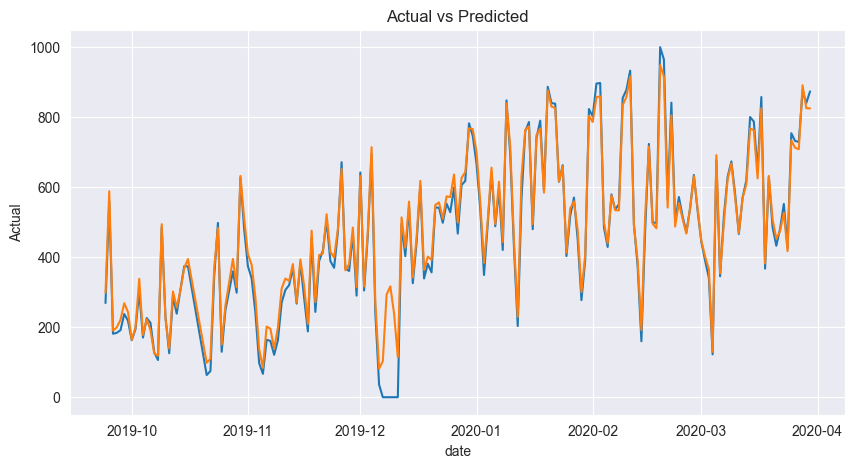

In [119]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(x=target_df_daily.index,y=target_df_daily["Actual"])
sns.lineplot(x=target_df_daily.index,y=target_df_daily["Predicted"])
ax.set(title="Actual vs Predicted")

In [150]:
df_final_mod = df_final.reset_index().rename(columns={"Unnamed: 0":"timestamp"})
df_final_mod["timestamp"] = pd.to_datetime(df_final_mod["timestamp"])
df_final_mod["date"] = df_final_mod["timestamp"].dt.date
df_final_daily = df_final_mod.groupby(by="date").mean()[["WindSpeed","ActivePower"]]

X_test_mod = X_test.reset_index().rename(columns={"Unnamed: 0":"timestamp"})
X_test_mod["timestamp"] = pd.to_datetime(X_test_mod["timestamp"])
X_test_mod["date"] = X_test_mod["timestamp"].dt.date
X_test_mod_2 = X_test_mod.groupby(by="date").mean()["WindSpeed"]

target_df_daily_final = pd.DataFrame(columns=["WindSpeed","ActivePower"])
target_df_daily_final["ActivePower"] = target_df_daily["Predicted"].values
target_df_daily_final["WindSpeed"] = X_test_mod_2.values
target_df_daily_final.index = target_df_daily.index


target_df_daily_final.head()

,WindSpeed,ActivePower
date,,
2019-09-24,4.853342,298.024231
2019-09-25,5.968495,588.308777
2019-09-26,4.261015,190.253754
2019-09-27,4.253687,199.513184
2019-09-28,4.491100,221.099686
